## An Anlysis of Different Similarity Measures with Utilisation of Parallel Processing

Documents were obtained from IMDB, each one is the series synopsis.
**Collecting d>10 documents** 


In [1]:
import nltk
nltk.download('punkt')
nltk.download('brown')
from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [11]:
from nltk.tokenize import word_tokenize
import time
import numpy as np
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import brown
import scipy.stats as stats
import math
import random
from collections import defaultdict
#import operator
from multiprocessing import Pool
from nltk.probability import FreqDist

## Introduction

In section 1 I will examine and analyse the Jaccard similarity measure applied to documents as bags of words.

In section 2 I examine the worst case run time for cosine similarity where documents are dense vectors. I also estimate the time constraint for implementation on my computer.

In section 3 I complete section 2 again however documents are sparse dictionaries.

In section 4 I compute the similarity measure for all possible pairs. Furthermore estimating the time taken to compare 200k documents.

In section 5 I utilise map-reduce parallel computing to find the similarity for all possible pairs of documents. I then analyse the number of map and reduce processes needed to make this the most efficient. (Submission of section 5 on Colab, converted to ipynb file, hence please do not run it otherwise the values will disappear).

In [6]:
docs = [] # appending all documents to one list
docs.append("In a small town where everyone knows everyone, a peculiar incident starts a chain of events that leads to the disappearance of a child, which begins to tear at the fabric of an otherwise peaceful community. Dark government agencies and seemingly malevolent supernatural forces converge on the town, while a few of the locals begin to understand that there's more going on than meets the eye.")
docs.append("In the mythical continent of Westeros, several powerful families fight for control of the Seven Kingdoms. As conflict erupts in the kingdoms of men, an ancient enemy rises once again to threaten them all. Meanwhile, the last heirs of a recently usurped dynasty plot to take back their homeland from across the Narrow Sea.")
docs.append("Thomas Shelby and his brothers return to Birmingham after serving in the British Army during WWI. Shelby and the Peaky Blinders, the gang he is leader of, control the city of Birmingham But as Shelby's ambitions extend beyond Birmingham, he plans to build on the business empire he's created, and stop anyone who gets in his way.")
docs.append("Stan Smith, who works for the C.I.A. and is constantly on the alert for terrorist activity, will go to extremes to protect his beloved America from harm; as evidenced by the terror-alert color code on his fridge, and his frequent knee-jerk reaction of shooting holes in the toaster whenever the toast pops up. In addition to Stan's wife and teenage children, the Smith household has two rather unconventional members. There's Roger, the sarcastic space alien who rescued Stan from Area 51, who deeply resents the fact that he's not allowed to leave the house, and therefore, has been reduced to drinking wine and smoking cigarettes, and Klaus, a lascivious, German-speaking goldfish; the result of a C.I.A. experiment gone seriously wrong, where the C.I.A. tried to give a fish a German man's brain. Stan's son is a dorky teenager who tries to be cool. His wife has had a past life of sex and drugs.")
docs.append("After the stories of Jango and Boba Fett, another warrior emerges in the Star Wars universe. The Mandalorian is set after the fall of the Empire and before the emergence of the First Order. We follow the travails of a lone gunfighter in the outer reaches of the galaxy far from the authority of the New Republic.")
docs.append("The streets of Baltimore as a microcosm of the US's war on drugs, and of US urban decay in general. Seen not only through the eyes of a few policemen and drug gang members but also the people who influence and inhabit their world - politicians, the media, drug addicts and everyday citizens.")
docs.append("Philip J. Fry is a twenty-five-year-old pizza delivery boy whose life is going nowhere. When he accidentally freezes himself on December 31, 1999, he wakes up one thousand years in the future, and has a chance to make a fresh start. He goes to work for the Planet Express Corporation, a futuristic delivery service that transports packages to all five quadrants of the universe. His companions include the delivery ship's Captain, Leela, a beautiful one-eyed female alien who kicks some serious butt, and Bender, a robot with very human flaws.")
docs.append("A mediocre paper company in the hands of Scranton, PA branch manager Michael Scott. This mockumentary follows the everyday lives of the manager and the employees he manages. The crew follows the employees around 24 7 and captures their quite humorous and bizarre encounters as they will do what it takes to keep the company thriving.")
docs.append("In this modernized version of the Conan Doyle characters, using his detective plots, Sherlock Holmes lives in early 21st century London and acts more cocky towards Scotland Yard's detective inspector Lestrade because he's actually less confident. Doctor Watson is now a fairly young veteran of the Afghan war, less adoring and more active.")
docs.append("Sick, twisted and politically incorrect, the animated series features the adventures of the Griffin family. Endearingly ignorant Peter and his stay-at-home wife Lois reside in Quahog, R.I., and have three kids. Meg, the eldest child, is a social outcast, and teenage Chris is awkward and clueless when it comes to the opposite sex. The youngest, Stewie, is a genius baby bent on killing his mother and destroying the world. The talking dog, Brian, keeps Stewie in check while sipping martinis and sorting through his own life issues.")
docs.append("The character-driven cartoon chronicles the nautical and often nonsensical adventures of SpongeBob, an incurably optimistic and earnest sea sponge, and his underwater friends. Dwelling a few fathoms beneath the tropical isle of Bikini Atoll in the sub-surface city of Bikini Bottom, SpongeBob lives in a two-story pineapple. Instead of taking the logical approach to everyday challenges, SpongeBob approaches life in a wayward and unconventional way. Whether searching for the ultimate spatula to perfect his burger flipping technique at the Krusty Krab or just hanging out with his best friend Patrick (an amiable starfish), SpongeBob's good intentions and overzealous approach to life usually create chaos in his underwater world.")
docs.append("The exploits of four friends, who are socially only marginally above what one of them calls the freaks, are presented as they grow from their late teen years into adults and as they go on their quest, usually unsuccessfully, for such grown up things as beer and sex. Simon Cooper, Jay Cartwright and Neil Sutherland have been friends for some time. Insecure Simon's main quest in life is to get long time friend, Carli D'Amato, to be his girlfriend. Jay is the big talker whose stories, especially about his sexual conquests, are more fantasy than reality. And slightly dim-witted Neil is generally two steps behind everyone else in comprehension of life, and who is always defending his father from beliefs that he's a closet homosexual. Into the group comes its fourth member, Will McKenzie, who met them when he transferred into their school, Rudge Park Comprehensive, at the start of sixth form, as Will's newly divorced mum could no longer afford his private school tuition. Nerdish and straight-laced Will, ridiculed for carrying a briefcase, insinuated himself in the group - not aiming his sights too high - as he tried not to be labeled as one of the freaks. Regardless, he is still the target of the school's psycho bully, Mark Donovan, and the head of Rudge Park's sixth form, Mr. Gilbert. Will's initial saving grace in bonding with his new mates may have been that they all want to shag his pretty but protective mother, Polly.")
docs.append("The Boys is set in a universe in which superpowered people are recognized as heroes by the general public and owned by a powerful corporation, Vought International, which ensures that they are aggressively marketed and monetized. Outside of their heroic personas, most are arrogant and corrupt. The series primarily focuses on two groups: the titular Boys, vigilantes looking to keep the corrupted heroes under control, and the Seven, Vought International's premier superhero team. The Boys are led by Billy Butcher, who despises all superpowered people, and the Seven are led by the egotistical and unstable Homelander. As a conflict ensues between the two groups, the series also follows the new members of each team: Hugh Hughie Campbell of the Boys, who joins the vigilantes after his girlfriend is killed in a high-speed collision by the Seven's A-Train, and Annie January/Starlight of the Seven, a young and hopeful heroine forced to face the truth about the heroes she admires.")
docs.append("Nearly a generation after the acclaimed Blue Planet documentary was released, David Attenborough returns to narrate this groundbreaking sequel/reboot. Blue Planet ll focuses more heavily on mankind's influence on the world's oceans through both global pollution and climate change. This series features a variety of revolutionary segments never before seen in a video documentary, including: cuttlefish that hypnotize crabs to stun them, giant trevally that leap out of the water to catch low flying birds, and newly discovered dancing yeti crabs.")

In [7]:
syn=[] #list of synopsis
for doc in docs:
    syn.append(word_tokenize(doc)) # creating one list to have all the documents

In [8]:
# generic timeit function
def timeit(somefunc,*args,repeats=50,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(len(times)**0.5)
 
    return (ans,mean,error)

In [9]:
def token_freq(bag): # turning all elements in the list into tokens with their respective frequencys of occurence
    dic={}
    for words in bag: # iterating over all of the words to look at them independently
        dic[words] = dic.get(words,0) +1
    return dic

In [10]:
def drawing(size,time,measure,style):
    # having to work out the run time and intercept using logs of both values 
    logtime=[np.log10(t) for t in time]
    logsize=[np.log10(s) for s in size]
    fig, axs = plt.subplots(2)
    axs[0].set_xlabel("Size of the {}".format(style))        #labeling axes
    axs[1].set_xlabel("Size of the {}(logs)".format(style))  #''''''
    axs[0].set_ylabel("Average Run Time")                    #''''''
    axs[1].set_ylabel("Average Run Time (logs)")             #''''''
    axs[0].set_title("Worst Case Run Time of {} Similarity".format(measure))
    axs[1].set_title("Worst Case Run Time of {} Similarity (Logs)".format(measure))
    axs[0].plot(size,time)
    axs[1].plot(logsize,logtime)
    # increasing the spacing between the plots to remove overlaps
    plt.subplots_adjust(top=1.5, hspace=0.5, wspace=0.5) 
    plt.show()
    # calculating the slope and intercept using built in library stats.linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(logsize, logtime)
    print("Slope is {} and intercept is {}".format(slope,intercept))

# Q1) 
#### Analysis of the theoretical running time of Jaccard’s similarity measure applied to large documents represented as bags of words (in a Python dictionary). Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate relevant constants for your implementation and computer.

Initially, I will define the Jaccard similarity and then iterate through my created list of documents to find the corresponding similarities compared to the first synopsis. I will present this in a data frame for easy visualisation. Then I will construct a time series graph looking at documents of huge sizes to find the estimated worst-case run time for my implementation.

### The Jacard's similarity formula
$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

In [11]:
# Generic Jaccard similarity formula
def Jaccard(dic1,dic2):
    Uni = 0
    Int = 0
    
    for item in dic1.keys():
        if item in dic2.keys():
            Int += 1
    Uni= (len(dic1.keys()) + len(dic2.keys()))- Int # using the above formula to find values
           
    return (Int / Uni)

In [12]:
#Creating a matrix to store all of the Jaccard similarities 
jacsims=[]
results = np.zeros((14,14),dtype=float) # creating empty matrix 
for i in range(14):
    for j in range(14): # iterating over all 2 dimensions
        if i >= j:
            results[i][j] = round(Jaccard(token_freq(syn[i]),token_freq(syn[j])),2) # adding the respective Jaccard  scores

In [13]:
# turning the result matrix into a nicely viewable Pandas DataFrame
df = pd.DataFrame(data = results, index = ["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10","doc11","doc12","doc13","doc14"],columns=["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10","doc11","doc12","doc13","doc14"])
display(df) 

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14
doc1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc2,0.09,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc3,0.09,0.08,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc4,0.08,0.07,0.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc5,0.07,0.08,0.10,0.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc6,0.10,0.08,0.14,0.10,0.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc7,0.09,0.08,0.11,0.12,0.08,0.09,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
doc8,0.07,0.08,0.11,0.07,0.09,0.12,0.07,1.00,0.00,0.00,0.00,0.00,0.0,0.0
doc9,0.10,0.08,0.12,0.08,0.10,0.11,0.08,0.09,1.00,0.00,0.00,0.00,0.0,0.0
doc10,0.09,0.06,0.10,0.09,0.09,0.11,0.08,0.08,0.08,1.00,0.00,0.00,0.0,0.0


In [11]:
# A test on the small amounts of documents from my "docs" list
timetaken=0
timex=[]
simscore=[]
docsize=[]
for i in range(len(docs)):
    times = [] 
    for repeat in range(100):
        start = timer() 
        jacsim= Jaccard(token_freq(syn[0]),token_freq(syn[i]))
        end = timer()
        timetaken +=(end-start)
    times=(timetaken/10)
    simscore.append(jacsim)
    timex.append(end-start)
    docsize.append(len(syn[0])+len(syn[i]))


In [12]:
data = [] #Turning the data into a list
data.append(timex)    #adding appropriate values
data.append(simscore) # ''''''
data.append(docsize)  #''''''
df=pd.DataFrame(data, index=['Running time','Similarity','Number of words'])
df=df.T  #Transpose method
df.sort_values('Number of words') #having the list ascend in order of number of words

,Running time,Similarity,Number of words
5,0.000066,0.103448,131.0
1,0.000068,0.086957,132.0
7,0.000067,0.065217,132.0
8,0.000068,0.096774,132.0
4,0.000033,0.068182,133.0
2,0.000074,0.090909,137.0
0,0.000074,1.000000,144.0
13,0.000078,0.098214,163.0
6,0.000046,0.092437,175.0
9,0.000089,0.089286,175.0


In [13]:
df["Number of words"].mean()

179.0

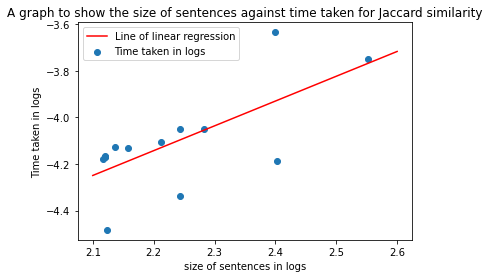

In [14]:
logdf1=[float(np.log10(t)) for t in df["Number of words"]]
logdf2=[float(np.log10(q)) for q in df["Running time"]]
m, b = np.polyfit(logdf1, logdf2,1) #builtin feature of numpy to plot the linear regression line
X = [2.1,2.2,2.3,2.4,2.5,2.6] #the already known x scale for logdf1
y = [m*x+b for x in X] #iterating over the X using known m and b from polyfit
plt.plot(X,y,"r") #plotting the line of linear regression in "red"
plt.scatter(logdf1,logdf2)
plt.legend(["Line of linear regression","Time taken in logs"]) #adding a key to the plot
plt.title("A graph to show the size of sentences against time taken for Jaccard similarity")
plt.xlabel("size of sentences in logs")
plt.ylabel("Time taken in logs"); # the use of ; here removes the text displayed above the graph

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logdf1, logdf2)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 1.063649194184263 and intercept is -6.482968371236066


Most of the documents in my list had a small number of words with the average number of words compared to being 179. From my extract of sentences, the order of the Jaccard implementation is $O(n^{1.064})$ with the coefficient of my computer being  $10^{-6}$ which equates to 0.000001 seconds.
This should have an order of 1. Since there isn't a large data set and the size of each doc isn't large this value will be slightly different from true expectation. Additionally there are hash collisions which imply that the two list words are not exactly unique and thus won't have the exact correct order.

For Jaccard similarity, the worst-case run time is when all documents have different words, however looking at very large sentences works in a similar way, below I have analysed the time taken to run on a changing list of words using the brown corpus up to the size I (the variable size of the document).

In [14]:
#Brown corpus download
times2 = []   #empty lists to iterate in values in for loop
size = []     #''''''
yerr = []     #''''''
for i in range(1000,10001,50): # looking at a large selection of sentence from the corpus
    A = token_freq(brown.words()[:i])
    B = token_freq(brown.words()[i:i*2]) # making sure that the two extracts from corpus are different but equal cardinality
    
    ans, timemean, error = timeit(Jaccard,A,B)
    yerr.append(error)
    size.append(i)
    times2.append(timemean)

In [15]:
#Function to plot an error bound on the graph
def errorplot(time,size,yerror):
    uppererror=[]
    lowererror=[]
    for i in range(len(yerror)):
        uppererror.append(time[i]+yerror[i]) # upper most error is addition
        lowererror.append(time[i]-yerror[i]) # lower most error is the subtraction
        
    plt.plot(size,time,"r") #plotting the true size against mean times

    plt.fill_between(size,uppererror,lowererror,color = "gray",alpha =0.2); 
    #the plt.fill_between allows the plots of upper and lower error to be a filled in plot
    #alpha here is how transparent the gray area is

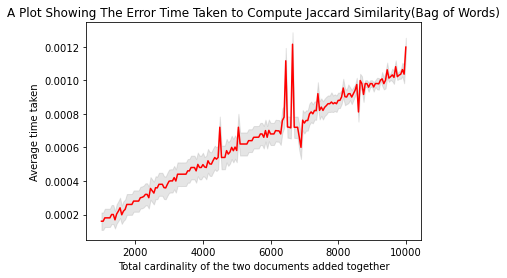

In [52]:
errorplot(times2,size,yerr)
plt.title("A Plot Showing The Error Time Taken to Compute Jaccard Similarity(Bag of Words)")
plt.xlabel("Total cardinality of the two documents added together")
plt.ylabel("Average time taken");

A plot to show the error bars indicating that the mean (red line) was obtained as the average of several runs and these runs were within the grey area. The error here is quite large and values fluctuate between the two boundaries through calculations. Because there are a large number of repeats the values balance out and the mean in red is used. The spikes in the graph should not be there, given that the scale on the y axis is minuscule the actual time taken does not vary vastly - the graph is slightly misleading. **This occurs on every plot in this analysis** These fluctuations are due to other processes occurring on my PC at the time of the run. The general trend is a linear graph as seen visually. A way to fix this is to use another program to time the function i.e Spyder or Google Colab as these do not relay information and work straight into the environment completing tasks independent of the computers' other processes being utilised.

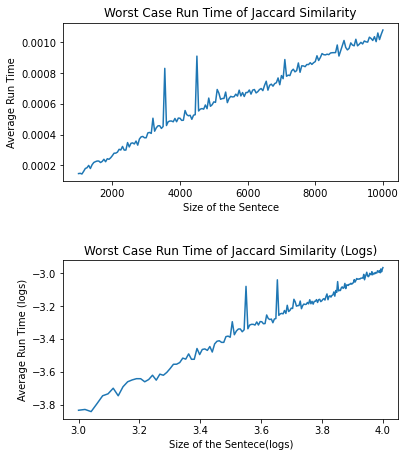

Slope is 0.8424741037106479 and intercept is -6.34049628923688


In [19]:
drawing(size,times2,"Jaccard","Sentece") #calling the draw function as defined at the begining of my work

### Theoretical worst-case running time analysis:
Jaccard's similarity is the proportion measure of the cardinalities of the intersection of two data sets to the cardinality of the union of the two sets. If the two sets are totally different then the similarity is 0, if they are identical then their similarity is 1. There are 3 steps to the Jaccard similarity. Firstly finding the union of two sets which has the worst run time of $O(n + n)$. Secondly a measure of the intersection of the two sets. Has a worst-case run time of $O(n \times n)$ The final step is the division of the above two. Thus the Jaccard's similarity has the worst running time depending on the document size $\implies$ for the size of n the similarity measure has the worst running time of $O(\frac{2n}{n^2})$. = $C(O(n))$ where C is a coefficient $ C \in \mathbb{R}$

### Time constraint for the implementation on my computer

From the above graphs, the first one is when the document cardinality increase from 50 to 10000 increments of 50, the running time had increased after each step and followed an uptrend. The jumps in times and the nonsmoothness of the graph are due to other processes occurring on my computer and changing the results slightly. This shows the difficulty in finding the trend. Since it is linear it should be approximate $O(n^1)$. The slops and intercept were found using maths. If $y=c_a.x^n$ then  $\log(y) = \log(c_a) + n \log(x)$
therefore, if I have plotted a graph of $\log(y)$ against $\log(x)$ which give me the relevant coefficient of my implementation and the order as well

From my calculations it shows that the calculations have ordered $O(n^{0.862})$ with a y-intercept of -6 this, therefore, means that $c_a \approx 10^{-6}$ From my analysis this implies that we have order 0.862 with a coefficient of 0.000001 seconds. This shows that the run time increases linearly with the increase in size.

This specific coefficient implies that when the size of the list increases by a factor of n then the run time will increase by $n^{0.862}$ taking into consideration the coefficient. This relays to a $ y = 10^{-6}n^{0.862}$ where we can calculate the run time for any size n of a sentence giving the run time in seconds as the y value.

# Q2)
#### What is the theoretical worst case running time of the cosine similarity measure applied to documents represented as (dense representation) vectors? Show that this is the case empirically. Estimate the constant for your implementation and computer. Compare using the implementation of the dot product in numpy with your own implementation.

Cosine similarity from a dense vector representation required computation of the documents into vectors. Using the function to make a matrix from lab 7, which allows a list of dictionaries with respective frequencies to be represented as dense vectors. In this section after the creation of the matrix I iterated through the list of documents and then used my own method to implement dot product- this has a time complexity of $O(n)$. Then using the cosine similarity formula which takes the previously mentioned quantity and divides the magnitude of the two. A time series of this was plotted with the addition "error" area shown. After this, I compared the result to the built-in dot product used by NumPy and additionally displayed the difference of run time on the same graph showing easy comparison.

### The Cosine Similarity Formula
#### cosine similarity = $\cfrac{A\cdot B}{\sqrt{A\cdot A}\times \sqrt{B\cdot B}} \equiv \cfrac{A\cdot B}{||A|| \times ||B||}$

In [17]:
""" Dense vector formation from a dictionary """

def matrix_creation(dicts_lists):
    features_dict={}       #empty diction to fill in with other dictionarys
    for dict_doc in dicts_lists: #looking at every single entry in the dictionary list
        for feature in dict_doc.keys(): #looking at every single word in the entry of diction lists
            features_dict[feature]=1 #for an instance of the word the features dictionary is assigned value 1
    
    dimensions=list(features_dict.keys())
    matrix=[]
    for dimension in dimensions:
        row=[(dict_doc.get(dimension,0)) for dict_doc in dicts_lists]
        matrix.append(row)   

    return matrix


In [18]:
#just for checking
dicta={'a':1, 'b':2, 'c':4}
dictb={'a':1, 'b':2, 'd':3}
l=[dicta, dictb]
matrix_creation(l)

[[1, 1], [2, 2], [4, 0], [0, 3]]

In [19]:
def dot(doc1,doc2):
    the_sum = 0
    for i in range(len(doc1)):
        the_sum += float(doc1[i] * doc2[i]) #conversion to float as my values exceeded the capable bit size storeable in python.
    return the_sum

In [20]:
#Generic cosine similarity formula
def cos_sim(doc1,doc2):
    numerator= dot(doc1,doc2)
    denominator = np.power((dot(doc1,doc1))*(dot(doc2,doc2)),0.5)
    similarity = numerator/denominator
    return similarity

In [21]:
#Using my dot product for cosine similarity
times3 = []
size2 = []
yerr2 = []
for n in range(1000,10001,50):
    size2.append(n)
    A = token_freq(brown.words()[:n])
    B = token_freq(brown.words()[n:2*n])
    
    # since we have 2xn  matrix -> for column wise cosine similarity we need to transpose
    # to get a n x 2 matrix
    matrices = np.array((matrix_creation([A,B])))
    m = matrices.transpose()
    
    ans, running_time, error=timeit(cos_sim,m[0], m[1])
    times3.append(running_time)
    yerr2.append(error) #keeping track of the error to plot the error bars
    

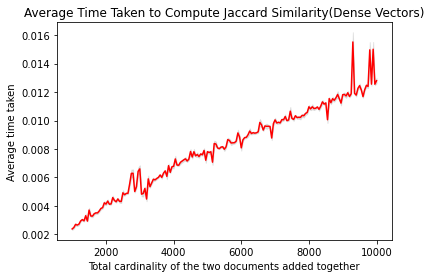

In [22]:
errorplot(times3,size2,yerr2)
plt.title("Average Time Taken to Compute Jaccard Similarity(Dense Vectors)")
plt.xlabel("Total cardinality of the two documents added together")
plt.ylabel("Average time taken");

The above gray area is the error bounds from the mean values found (in red). This is the boundary where values were from the time it functions. The values do not vary very much from the mean and the precision is high here with values having a small varying range of values. For this method the errors were very small this implies that the data is more representative of the true mean. There are not many notable irregularities.

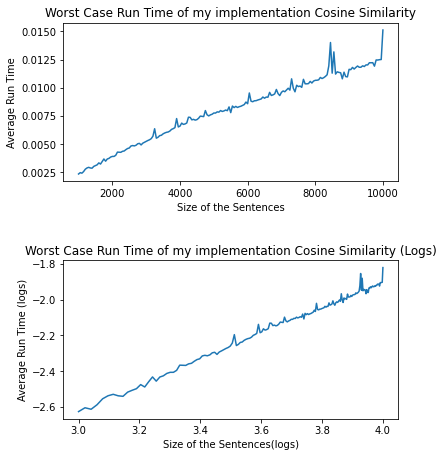

Slope is 0.7251091294641036 and intercept is -4.797314409495042


In [27]:
drawing(size2,times3,"my implementation Cosine","Sentences") #calling the draw function from first section

See Time Constraint section below for interpretation of these above results.

In [25]:
def norm(doc): #creating the denominator to remove the squareroot by 0 error
    total = 0
    for i in range(len(doc)):
        if doc[i] != 0: #only values that dont have 0 change the total (just filtering them out to fix error)
            total+= doc[i]**2
    return np.sqrt(total)

In [26]:
#Generic Cosine Similarity formula using built in NumPy dot product instead of my self created dot product formula.
def np_cos_sim(doc1,doc2):
    numerator = (np.dot(doc1,doc2))
    denominator = norm(doc1)*norm(doc2)
    similarity = numerator/denominator
    return similarity

In [27]:
#Just for checking
print(np_cos_sim([1,0],[1,0]))
np_cos_sim([1,0],[-1,0])

1.0


-1.0

In [28]:
#Using my dot product for cosine similarity
times4 = []
size3= []
yerr3=[]
for n in range(1000,10001,50):
    size3.append(n)
    A = token_freq(brown.words()[:n])     #to select different words of the corpus
    B = token_freq(brown.words()[n:2*n])  #''''''
    
    # since we have 2xn  matrix -> for column wise cosine similarity we need to transpose
    # to get a n x 2 matrix
    matrices = np.array((matrix_creation([A,B])))
    m = matrices.transpose()
    ans ,running_time, error=timeit(np_cos_sim,m[0], m[1])
    times4.append(running_time)
    yerr3.append(error)

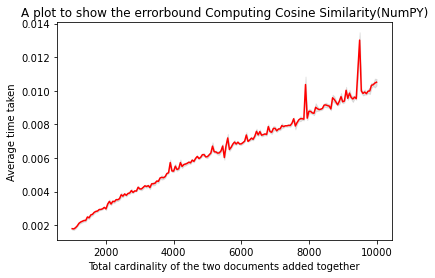

In [32]:
errorplot(times4,size3,yerr3)
plt.title("A plot to show the errorbound Computing Cosine Similarity(NumPY)")
plt.xlabel("Total cardinality of the two documents added together")
plt.ylabel("Average time taken");

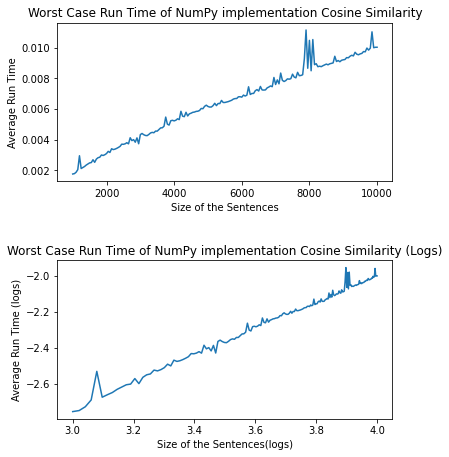

Slope is 0.7351222860234441 and intercept is -4.934603647376345


In [34]:
drawing(size3,times4,"NumPy implementation Cosine","Sentences")  #calling the draw function from first section

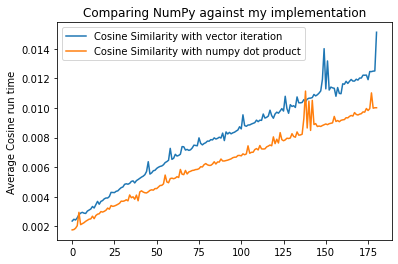

In [35]:
# plots to compare the two version of Cosine Similarity
plt.plot(times3)
plt.plot(times4)
plt.title("Comparing NumPy against my implementation")

label = ["Cosine Similarity with vector iteration","Cosine Similarity with numpy dot product"]
plt.legend(label)
plt.ylabel('Average Cosine run time')
plt.show()

### Time constraint for the implementation on my computer

From both charts above, the size of the list is increased dramatically over a large range. running time of the cosine similarity increased at each step and followed a general upward trend. The jumps are not smooth due to my computer handling other processes at the same time however we can clearly see that with both implementations of cosine similarity the running time increases.

Finding this mathematically using the fact that if $ y = ca \times x^n \implies  log(y) = log(ca)+ n log(x)$

The observations showed that the trend was similar to the linear $O(n^1)$
From my calculations it shows that the calculations, have order  $𝑂(𝑛^{0.789})$  with a y-intercept of -5 this, therefore, means that  $ca \approx 10^{−5}$  From my analysis this implies that we have order 0.947 with coefficient 0.00001 seconds. This shows that the run time increases linearly with the increase in size (as expected from mathematical calculations).

My specific coefficient implies that when the size of the list increases by a factor of n then the run time will increase by $n^{0.789}$ taking into consideration the coefficient. This relays to a $ y = 10^{-5}n^{0.789}$ where we can calculate the run time for any size n of a sentence giving the run time in seconds as the y value.


The NumPy implementation on the same set of words showed a smaller run time order of $O(n^{0.799})$ with the same coefficient of 0.00000398 seconds. ($ca \approx 10^{−5.4}$). his empirically demonstrates that the measure for the NumPy dot product was more efficient than my implementation. This was also visualized on the chart above showing the two on the same plot. Therefore if we wish to carry out cosine similarity we should use the NumPy dot product to ensure the most effective use of complexity.


The two should have $O^1$ However because of the two lists not being exactly unique there are quicker proceses done because of duplicate words. (Hash collisions).

# Q3)
#### Write a function which computes cosine similarity directly from sparse (dictionary) representations without converting them into dense (vector) representations. Test your function for correctness and compare its efficiency theoretically and empirically to (i) your previous implementation of the cosine similarity, and (ii) your implementation of Jaccard’s measure.

In [3]:
fileids= gutenberg.fileids() #Getting all the different book inside the gutenburg corpus in terms of ids
docsA= [gutenberg.words(i) for i in fileids] #gutenberg.words alows us to extract all sentences from the gutenberg corpus
wordsA = []
for d in docsA:
    for i in d:
        wordsA.append(i)

In [59]:
fileids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [34]:
A = token_freq(random.sample(wordsA,20)) #random sample of 20 words from the word pool created at the begining of this section
B = token_freq(random.sample(wordsA,20)) #''''''
C = token_freq(random.sample(wordsA,20)) #''''''

In [35]:
print(A, '\n', B, '\n',C) # using \n to display on a new line 
# the print here displays the sparse (dictionary) representation

{'good': 1, 'people': 1, 'until': 1, 'of': 1, 'father': 1, '-': 1, 'On': 1, '.': 1, 'side': 1, 'mornings': 1, 'And': 3, 'possess': 1, 'five': 1, 'Willoughby': 1, 'lord': 1, 'yet': 1, "'": 1, ':': 1} 
 {'that': 1, 'Lethee': 1, ',': 3, '.': 1, 'a': 1, 'the': 1, 'Musgrove': 1, 'or': 1, 'Sought': 1, 'music': 1, 'pressed': 1, 'in': 1, 'subject': 1, 'being': 1, 'behold': 1, 'The': 1, 'jewels': 1, 'John': 1} 
 {'feigned': 1, '13': 1, 'you': 2, 'was': 1, 'known': 1, 'the': 1, 'to': 1, 'concerned': 1, 'slim': 1, 'their': 1, 'people': 1, 'Your': 1, ';': 1, 'that': 1, 'and': 2, 'out': 1, 'her': 1, 'his': 1}


Here the "dot" product function I defined earlier is used however there is a need for slight manipulation due to the documents now due to the document being represented as a frequency distribution. The function below created a sparse diction representation of the dictionary to use as per the question.

In [36]:
def freqdot(docA,docB): #method to obtain the dotproduct from frequency distribution dictionary
    product = 0
    for word, count in docA.items():
        product += count * docB.get(word,0) #the 0 in .get will use 0 if there is no word in the docB
    return product


Same cos_sim used here as define in question 2. However the freqdot needs to be used as the input is now a different data type.

In [37]:
#Generic Cosine Similarity formula using frequency dotproduct for dot product of terms
def cos_sim_freqdot(doc1,doc2):
    numerator= freqdot(doc1,doc2)
    denominator = np.sqrt(freqdot(doc1,doc1)*freqdot(doc2,doc2))
    similarity = numerator/denominator
    return similarity

In [38]:
times5 = []
size4 = []
yerr4 = []
for n in range(1000,10001,50):
    size4.append(n)
    A = token_freq(random.sample(wordsA,n)) #random sample for word pool
    B = token_freq(random.sample(wordsA,n)) #''''''
    
    ans, timemean, error = timeit(cos_sim_freqdot,A,B)
    times5.append(timemean)
    yerr4.append(error)

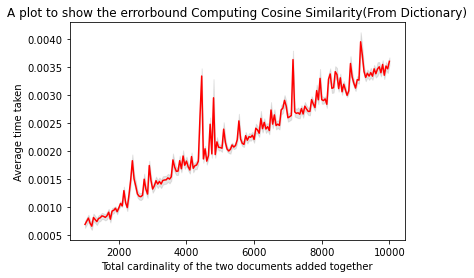

In [39]:
errorplot(times5,size4,yerr4)
plt.title("A plot to show the errorbound Computing Cosine Similarity(From Dictionary)")
plt.xlabel("Total cardinality of the two documents added together")
plt.ylabel("Average time taken");

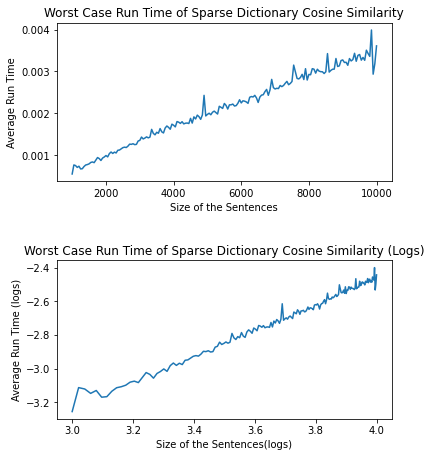

Slope is 0.764983229841675 and intercept is -5.524565918218695


In [44]:
drawing(size4,times5,"Sparse Dictionary Cosine","Sentences")   #Calling draw function from first section

### Time constraint for the implementation on my computer

Here there is only one for loop and thus the time constraint should only be $O(n)$  This is from the function which computed the cosine similarity from dictionary representations. This indicates that the similarity is measured by keys and the frequency of the dictionary. From the above chart, the worst-case run time of cosine similarity is illustrated above as having order $O(n^{0.949})$ with a coefficient of $10^{-6.34}$. This way I can estimate the run time of any size using the equation $y = 10^{-6.34}n^{0.949}$. 

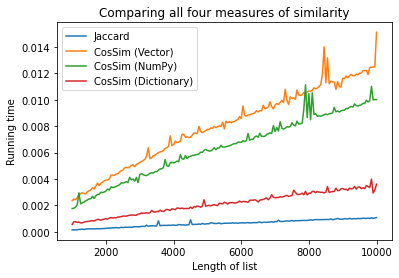

In [45]:
# plotting all the different methods on the same graph
plt.plot(size,times2)
plt.plot(size2,times3)
plt.plot(size3,times4)
plt.plot(size4,times5)
label = ["Jaccard","CosSim (Vector)","CosSim (NumPy)","CosSim (Dictionary)"]
plt.xlabel("Length of list")
plt.ylabel("Running time")
plt.title("Comparing all four measures of similarity")
plt.legend(label,loc=2,ncol=1) #here using loc and ncol to change the location of the key
plt.show()


From the above representation, it is indicated that the four algorithms do all take longer to run with the size of lists increase. The trend of the vector implementation of Cosine Similarity clearly was the most intensive algorithm to run. In addition, the NumPy also took the longest to run. This is due to the fact that the algorithm has to perform tasks to isolate the lists into appropriate features and labels. The dictionary method already has the information pre-processed outside the for loop and thus does not take as long to process. The preprocess into dictionary reduces the size of the data being processed and in turn, reduces the running time. Jaccard had the lowest run time as it does not need to iterate through any arrays and only run time is determined by the intersection and union of the two documents only. This stems from the idea that looking up entries from a Python dictionary is fast however dictionaries do use a lot of memory so there is a space-time trade-off, this is due to dictionaries using hash tables which is a built-in mapping type that has been highly optimised in Python.

Here we can tell that similarity measure is most efficiently applied using either Jaccard or Cosine $\iff$ the Dictionary is pre-computed.

## Q4)
#### Write a function which computes all-pairs similarities for a collection of documents. The function should take a list of dictionaries (the document collection) and a parameter specifying the similarity measure to be used. 

#### What is the theoretical worst-case running time for computing all-pairs similarities? Does it matter what the similarity measure is? Can you give an estimate of how long it would take to compute all-pairs similarities for 200K documents for both measures? (Note: that whilst you should test your function for all-pairs similarities (with d > 10), you do not need to prove the theoretical worst case empirically or test with 200K documents!)

In [42]:
def random_sample(words,size): #obtaining random sample from all the words
    sentence= random.sample(words,size)
    return sentence

In [43]:
def diclist(words,n): #turning the words into dictionarys
    dictionarylist = [token_freq(random.sample(words,100)) for i in range(n)]
    return dictionarylist

In [44]:
def all_pairs_sim(dicts,measure): 
    sims=np.zeros((len(dicts),len(dicts))) #creating empty matrix to interate in
    for i,A in enumerate(dicts):
        for j,B in enumerate(dicts):
            sims[i][j] = measure(A,B) #at the matrix the repsective similarity is input
    return sims

In [45]:
dictionarylist10 = diclist(wordsA,10)

In [46]:
print("Jaccard Similarity")
results2 = all_pairs_sim(dictionarylist10,Jaccard)
df2 = pd.DataFrame(data = results2, index = ["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10"],columns=["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10"])
display(df2) #DataFrame representation

Jaccard Similarity


,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10
doc1,1.000000,0.110294,0.153846,0.139535,0.115385,0.143939,0.122137,0.146154,0.122137,0.136364
doc2,0.110294,1.000000,0.110294,0.121212,0.106061,0.109489,0.112782,0.102941,0.096296,0.118519
doc3,0.153846,0.110294,1.000000,0.122137,0.124031,0.161538,0.130769,0.155039,0.122137,0.119403
doc4,0.139535,0.121212,0.122137,1.000000,0.154472,0.129771,0.116279,0.097744,0.125000,0.139535
doc5,0.115385,0.106061,0.124031,0.154472,1.000000,0.140625,0.109375,0.099237,0.136000,0.132812
doc6,0.143939,0.109489,0.161538,0.129771,0.140625,1.000000,0.129771,0.162791,0.129771,0.152672
doc7,0.122137,0.112782,0.130769,0.116279,0.109375,0.129771,1.000000,0.114504,0.116279,0.130769
doc8,0.146154,0.102941,0.155039,0.097744,0.099237,0.162791,0.114504,1.000000,0.097744,0.128788
doc9,0.122137,0.096296,0.122137,0.125000,0.136000,0.129771,0.116279,0.097744,1.000000,0.130769
doc10,0.136364,0.118519,0.119403,0.139535,0.132812,0.152672,0.130769,0.128788,0.130769,1.000000


In [47]:
print("Cosine Similarity")
results3 = all_pairs_sim(dictionarylist10,cos_sim_freqdot)
df3 = pd.DataFrame(data = results3, index = ["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10"],columns=["doc1","doc2","doc3","doc4","doc5","doc6","doc7","doc8","doc9","doc10"])
display(df3) #display as DataFrame

Cosine Similarity


,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10
doc1,1.000000,0.591571,0.399469,0.553744,0.508046,0.548610,0.687355,0.527168,0.583352,0.550797
doc2,0.591571,1.000000,0.486895,0.620186,0.320750,0.447419,0.572937,0.420813,0.566471,0.521539
doc3,0.399469,0.486895,1.000000,0.588865,0.368668,0.472703,0.452190,0.407807,0.561142,0.515922
doc4,0.553744,0.620186,0.588865,1.000000,0.467040,0.501381,0.589004,0.471427,0.657384,0.583338
doc5,0.508046,0.320750,0.368668,0.467040,1.000000,0.568820,0.608645,0.576426,0.464758,0.503497
doc6,0.548610,0.447419,0.472703,0.501381,0.568820,1.000000,0.586636,0.574572,0.499623,0.545287
doc7,0.687355,0.572937,0.452190,0.589004,0.608645,0.586636,1.000000,0.576368,0.569844,0.592523
doc8,0.527168,0.420813,0.407807,0.471427,0.576426,0.574572,0.576368,1.000000,0.478232,0.477459
doc9,0.583352,0.566471,0.561142,0.657384,0.464758,0.499623,0.569844,0.478232,1.000000,0.587304
doc10,0.550797,0.521539,0.515922,0.583338,0.503497,0.545287,0.592523,0.477459,0.587304,1.000000


#### Note: The two times plots below will take a while to run

In [48]:
times6=[]
size5=[]
yerr5 = []
for n in range(30,100,1): #starting number of documets 30 since I noticed that asymptotic behaviour didn't start till 40+
    size5.append(n)
    alldics= diclist(wordsA,n)
    ans, running_time, error = timeit(all_pairs_sim,alldics,Jaccard)
    times6.append(running_time)
    yerr5.append(error)

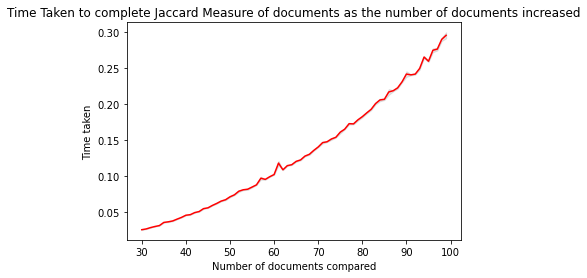

In [49]:
errorplot(times6,size5,yerr5)
plt.title("A plot to show the errorbound in completing Jaccard Measure of documents as the number of documents increased")
plt.xlabel("Number of documents compared")
plt.ylabel("Time taken");

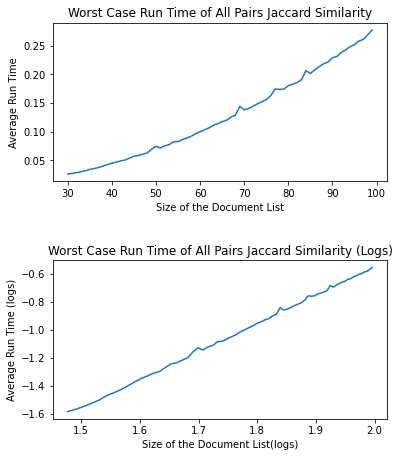

Slope is 2.0109840581707163 and intercept is -4.57328685874377


In [55]:
drawing(size5,times6,"All Pairs Jaccard","Document List")

**Comments on this are at the end of the section**

In [57]:
times7=[]
size6=[]
yerr6 = []
for n in range(30,100,1):
    size6.append(n)
    alldics= diclist(wordsA,n) #below repeats reduced due to excessive run time
    ans, running_time, error = timeit(all_pairs_sim,alldics,cos_sim_freqdot,repeats=10) 
    times7.append(running_time)
    yerr6.append(error)

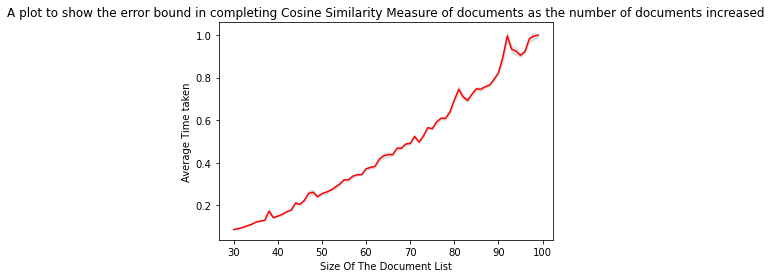

In [58]:
errorplot(times7,size6,yerr6)
plt.title("A plot to show the error bound in completing Cosine Similarity Measure of documents as the number of documents increased")
plt.xlabel("Size Of The Document List")
plt.ylabel("Average Time taken");

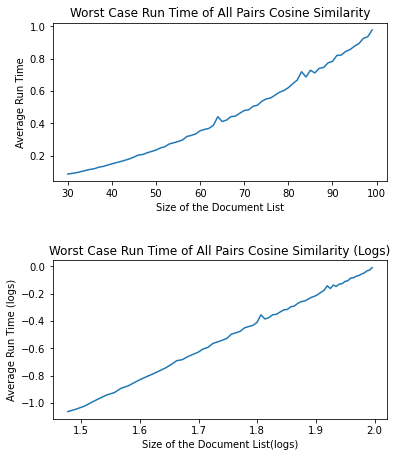

Slope is 2.055393582574163 and intercept is -4.1151622605128555


In [59]:
drawing(size6,times7,"All Pairs Cosine","Document List")

The above is for Jaccard and Cosine Similarity respectively. Both had a time complexity close to $O(n^2)$ Using mathematics for if $ y = Cx^n$ (x = number of documents). Then the coefficient C and order n are calculated from the log-log graph specifically : $log(y) = log(C) + n log(x)$ Here for Jaccard we find $y = 10^{-4.57}x^{2.01}$, similarily for Cosine $y = 10^{-4.12}x^{2.06}$. Since the cosine similarity has some operations done prior to the for a loop this run time may appear lower than the true value. We do know that these two methods do have quadratic complexity due to what is happening. Two objects of order n are calculated together giving the quadratic order.

From the **Cosine Similarity** equality where y is the the theoretical run time, $\implies$  the run time for 200k documents where x = 200,000 is - run time $ = 10^{-4.12}(200000)^{2.06}$ = 6311343 seconds $\approx$ 73 days.

Similarity for **Jaccard Similarity** run time = $10^{-4.57}(200000)^{2.01}$ = 1216382 seconds $\approx$ 14 days.

## Q5)
#### Use the map-reduce computing paradigm to implement a parallel version of all-pairs similarities for documents. Make sure you test your function empirically for correctness and for efficiency. Investigate the number of map processes and reduce processes which give optimal results for your implementation and computer.

Task completed on Google Colab. Please see other attachment.

The idea behind parallel computing is to speed up processing speed by splitting the tasks into one "bank" of memory at once. Where the one instruction is being done multiple times to speed up computation speed. Codes are written in for loops and complaints which are written to parallelise the same operation over a range of memory. This is loaded into the memory at one instruction. Work is pushed onto different processors by spawning different threads which receive a share of the computation.

In this question, I used the MapReduce paradigm to implement my parallel similarity version of all pairs of documents. The parallel mapper is done to divide the combination of all documents and turn them into key-value pairs. The key-value I used was (document1,(document1,document2)) i.e (0,(0,1)). This is done to complete the individual computation. After the map task, key-value pairs are grouped by key and form a list of values. The reduce function is also a pair of key-value. The reduction part is a simple Jaccard and cosine similarity which also take the same input i.e (0,(0,1)) and (0,(0,2)) from the list are grouped. The run time of the MapReduce for Cosine and Jaccard are much lower than ordinary computation due to the parallel computation paradigm.

Most efficient number of processes: **Jaccard** 3 map processes, 2 reduce processes.
**Cosine** 2 map processes, 1 reduce processes.

## Summary



My work has analysed both Jaccard and Cosine similarity measures using normal processing and parallel processing. For question 1 and question 2, the worst-case running time was calculated and constants were estimated for my computer. Results conducted that the time complexity of Jaccard, Cosine (vector) and Cosine(dictionary) were : $O(n^{0.842}) ,  O(n^{0.725}),  O(n^{0.765})$ respectively. All these values are less than the theorettical expectation, this is due to potential **hash collions**. Hashing breaks the input file into chunks, hashes those, and then uses this list to compare the similarity of two files. Question 4 analysed if the number of documents increases what is the effect on computation time. These all increase with Jaccard and Cosine(all similarities from dictionaries) having complexity : $O(n^{2.011})$ and $O(n^{2.055})$ respectively. 

Finally, the MapReduce paradigm vastly reduces the run time and in turn the time complexity due to its core multithread processing technique. The MapReduce technique is utilised for massive data to reduce running time and increase efficiency. From my test and calculations **for Jaccard** I have found that implementing 3 mapping processes and 2 reducing processes was the most efficient for my computer. Additionally **for Cosine** I have found that implementing 2 mapping processes and 1 reducing process was the most efficient for my computer.

In [31]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="ADS244816 .ipynb"
question_count=680

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 2110
